In [1]:
import pandas as pd
import numpy as np

In [2]:
#Data import
df = pd.read_csv('netflix_titles_nov_2019.csv')
df.head(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [3]:
# Data Investigation
df.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [5]:
df.shape

(5837, 12)

In [6]:
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [7]:
df.show_id.nunique()

5837

In [8]:
df.title.nunique()

5780

In [9]:
df.title.value_counts()

Tunnel                                           3
Love                                             3
Oh My Ghost                                      3
Limitless                                        3
The Silence                                      3
                                                ..
The Big Catch                                    1
The Bible's Buried Secrets                       1
Sword Art Online Alternative: Gun Gale Online    1
Sparta                                           1
To and From New York                             1
Name: title, Length: 5780, dtype: int64

In [10]:
#Data Cleaning

# Drop id column
# Drop dublicate shows
# create a new column shows the number of cast in each row
# we have 10 missing rows in rating column, replace them by the mode
# for the missing rows in added_date column, replace them by January 1,{release_year}
# I think we can not replace missing rows in column country by other countries, but we can use genre to
# identify this country ex: replace missing rows by japan for Anime
# convert the date_added column from object type to datetime

In [11]:
# z = df['date_added'].isna()
# df.loc[z,'date_added']='January 1,{}'.format(df.loc[z]['release_year'])
# df



In [12]:
# df.to_excel('demo.xlsx')

In [13]:
# Drop id column

df.drop(['show_id'],axis='columns')

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...
5832,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


In [14]:
#Drop dublicate shows

df.drop_duplicates(['show_id'],inplace=True)


In [15]:
# create a new column shows the number of cast in each row
df['cast'] = df['cast'].replace(np.nan,'unknow')

def cast_count(cast):
    if cast == 'unknow':
        return 0
    else:
        lcc = cast.split(',')
        result = len(lcc)
        return result
    
df['no.of_cast'] = df['cast'].apply(cast_count)
df['no.of_cast']
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,no.of_cast
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,1
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,8
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,9
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,10
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,6
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,12
5835,70157452,Dinner for Five,NaN,unknow,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,0


In [16]:
# x=df['show_id']

# for i in x:
#     print(i)

In [17]:
# we have 10 missing rows in rating column, replace them by the mode

df.rating.value_counts()

TV-MA       1937
TV-14       1593
TV-PG        678
R            439
PG-13        227
NR           218
PG           160
TV-Y7        156
TV-G         147
TV-Y         139
TV-Y7-FV      92
G             32
UR             7
NC-17          2
Name: rating, dtype: int64

In [18]:
df.rating.isnull().sum()

10

In [19]:
df.rating = df.rating.fillna(df.rating.mode()[0])
df.rating.isnull().sum()

0

In [20]:
# x = pd.Series([1,1,1,1,2,2,2,2,3,3,3,3])
# x.mode()[0]

In [21]:

# def funct(date):
#     if df.date_added==np.nan:
#         x=df.release_year
#         df['date_added'] = df.date_added.fillna('January 1,{}'.format(x))
        
        

# df['date_added'] = apply(funct)


# z = df['date_added'].isna()

# df[z]

In [22]:
# for the missing rows in added_date column, replace them by January 1,{release_year}
x = df.release_year.mode()[0]
df['date_added'] = df.date_added.fillna('January 1,{}'.format(x))
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,no.of_cast
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,1
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,8
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,9
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","January 1,2018",2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,10
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,6
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,12
5835,70157452,Dinner for Five,NaN,unknow,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,0


In [23]:
# df.to_excel('check_data3.xlsx',sheet_name='sheet2')

In [24]:
df['country'].values

array(['South Korea', nan, 'India', ..., 'Denmark', 'United States',
       'United States'], dtype=object)

In [25]:
df[['director','cast','country','date_added']].isnull().sum()

director      1901
cast             0
country        427
date_added       0
dtype: int64

In [26]:
df = df.dropna(axis=0,thresh=12)
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,no.of_cast
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,1
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,8
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,9
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","January 1,2018",2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,10
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,6
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,12
5835,70157452,Dinner for Five,NaN,unknow,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,0


In [27]:
df.isnull().sum()

show_id            0
title              0
director        1618
cast               0
country          144
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
type               0
no.of_cast         0
dtype: int64

In [28]:
df.shape

(5554, 13)

In [29]:
# I think we can not replace missing rows in column country by other countries, but we can use genre to
# identify this country ex: replace missing rows by japan for Anime

df.country.values

array(['South Korea', nan, 'India', ..., 'Denmark', 'United States',
       'United States'], dtype=object)

In [30]:
df.country.isnull().sum()

144

In [31]:
# df['country'] = df['country'].replace(np.nan,"unknown")
for i,j in zip(df.index,df.country.values):
    if j == 'unknown':
        if ('Anime' in df.loc[i,'listed_in']) or ('anime' in df.loc[i,'listed_in']):
            df.loc[i,'country'] = 'Japan' 
        else:
            continue
            
    else:
        continue
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,no.of_cast
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,1
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,8
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,9
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","January 1,2018",2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,10
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,6
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,12
5835,70157452,Dinner for Five,NaN,unknow,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,0


In [32]:
df['date_added'] = pd.to_datetime(df['date_added'])

C:\Users\uif39101\AppData\Local\Temp\ipykernel_9888\2944776423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'])


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5554 entries, 0 to 5836
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5554 non-null   int64         
 1   title         5554 non-null   object        
 2   director      3936 non-null   object        
 3   cast          5554 non-null   object        
 4   country       5410 non-null   object        
 5   date_added    5554 non-null   datetime64[ns]
 6   release_year  5554 non-null   int64         
 7   rating        5554 non-null   object        
 8   duration      5554 non-null   object        
 9   listed_in     5554 non-null   object        
 10  description   5554 non-null   object        
 11  type          5554 non-null   object        
 12  no.of_cast    5554 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 607.5+ KB


In [34]:
# Exploratory Data Analysis

# Understand every category in rating column(Google it)
# Understanding what content is available in different countries.
# Is Netflix has increasingly focusing on TV rather than movies in recent years.
# The most observed rating categories in TV-shows and Movies
# Identifying similar content by matching text-based features
# How many content its release year differ from its year added

In [35]:
# Understand every category in rating column

df.rating.value_counts()

TV-MA       1879
TV-14       1492
TV-PG        635
R            439
PG-13        227
NR           217
PG           160
TV-G         139
TV-Y7        132
TV-Y         107
TV-Y7-FV      87
G             31
UR             7
NC-17          2
Name: rating, dtype: int64

In [36]:
for i in df.index:
    if df.loc[i,'rating']=='UR':
        df.loc[i,'rating']='NR'
    else:
        continue
       

In [37]:
df.rating.value_counts()

TV-MA       1879
TV-14       1492
TV-PG        635
R            439
PG-13        227
NR           224
PG           160
TV-G         139
TV-Y7        132
TV-Y         107
TV-Y7-FV      87
G             31
NC-17          2
Name: rating, dtype: int64

Text(0.5, 0, 'rating')

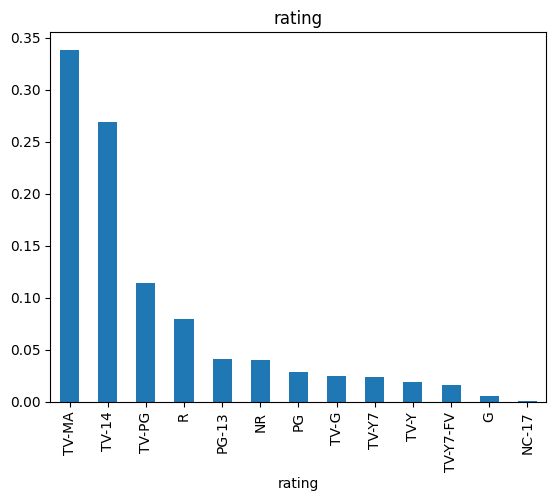

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


df['rating'].value_counts(normalize=True).plot.bar()
plt.title('rating')
plt.xlabel('rating')



In [39]:
import seaborn as sns

<AxesSubplot: xlabel='rating', ylabel='count'>

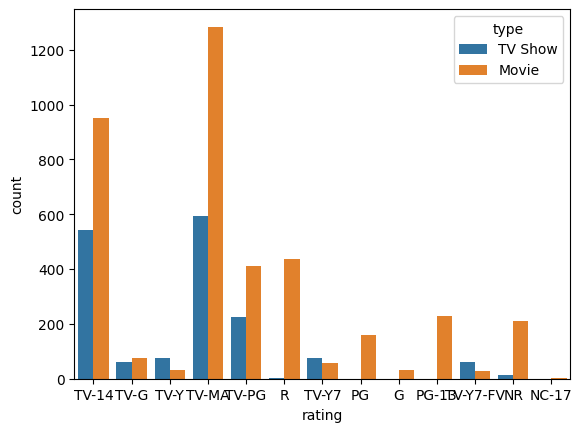

In [40]:
# The most observed rating categories in TV-shows and Movies

sns.countplot(x='rating',hue='type',data=df)

In [41]:
# Understanding what content is available in different countries.

df.country.value_counts().sort_values(ascending=False)


United States                                                                                               1907
India                                                                                                        697
United Kingdom                                                                                               336
Japan                                                                                                        168
Canada                                                                                                       139
                                                                                                            ... 
United Arab Emirates, Jordan                                                                                   1
Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands       1
Canada, United Kingdom, Netherlands                                                             

<AxesSubplot: xlabel='country', ylabel='count'>

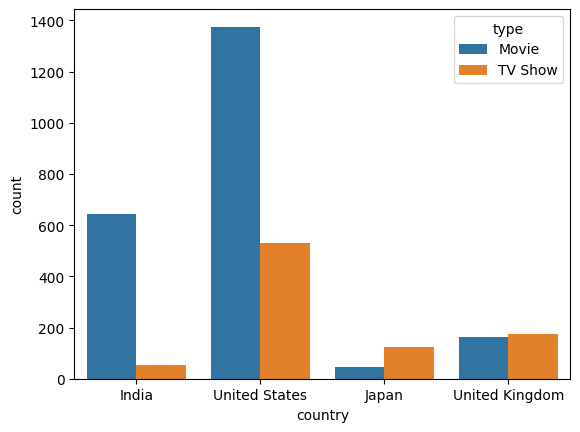

In [42]:
top_country = df[(df['country']=='United States') | (df['country']=='India') |(df['country']=='United Kingdom') | 
                 (df['country']=='Japan')]

sns.countplot(x='country',hue='type',data=top_country)

In [43]:
for i in top_country['country'].unique():
    print(i)
    print(top_country[top_country['country']==i]['rating'].value_counts(normalize=True)*100)
    print('-'*10)

India
TV-14       53.084648
TV-MA       23.529412
TV-PG       17.073171
NR           2.869440
TV-G         1.004304
TV-Y7        0.717360
PG-13        0.573888
PG           0.430416
TV-Y7-FV     0.286944
R            0.286944
TV-Y         0.143472
Name: rating, dtype: float64
----------
United States
TV-MA       31.515469
TV-14       17.409544
R           12.165705
TV-PG       10.854746
PG-13        7.079182
PG           4.876770
NR           4.824331
TV-G         3.198741
TV-Y7        2.621919
TV-Y7-FV     2.097535
TV-Y         2.045097
G            1.258521
NC-17        0.052438
Name: rating, dtype: float64
----------
Japan
TV-14       46.428571
TV-MA       25.595238
TV-PG       10.119048
NR           7.142857
TV-Y7        5.357143
PG-13        1.785714
TV-Y7-FV     1.190476
TV-Y         1.190476
PG           0.595238
TV-G         0.595238
Name: rating, dtype: float64
----------
United Kingdom
TV-MA       40.773810
TV-14       22.321429
TV-PG       18.452381
R            7.142857
TV-

In [44]:
# now let's see if Netflix focuse on TV rather than movies in recent years(2017-2018-2019)

# group = df.groupby('release_year')
# group

In [56]:
# df['year_added'] = df['date_added'].dt.year

In [57]:
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,no.of_cast,year_added
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8,2019
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,1,2019
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,8,2019
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,9,2019
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",2018-01-01,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,10,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,10,2010
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,6,2009
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,12,2009
5835,70157452,Dinner for Five,NaN,unknow,United States,2008-02-04,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,0,2008


In [47]:
df.year_added.unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008], dtype=int64)

In [48]:
x = df.groupby('year_added')['type'].value_counts(normalize=True)*100
x


year_added  type   
2008        Movie       50.000000
            TV Show     50.000000
2009        Movie      100.000000
2010        Movie      100.000000
2011        Movie      100.000000
2012        Movie       66.666667
            TV Show     33.333333
2013        Movie       66.666667
            TV Show     33.333333
2014        Movie      100.000000
2015        Movie       78.082192
            TV Show     21.917808
2016        Movie       64.411028
            TV Show     35.588972
2017        Movie       80.353982
            TV Show     19.646018
2018        Movie       59.240389
            TV Show     40.759611
2019        Movie       77.943711
            TV Show     22.056289
Name: type, dtype: float64

In [49]:
y=df.type.value_counts(normalize=True)
y

Movie      0.702917
TV Show    0.297083
Name: type, dtype: float64

<AxesSubplot: xlabel='year_added', ylabel='count'>

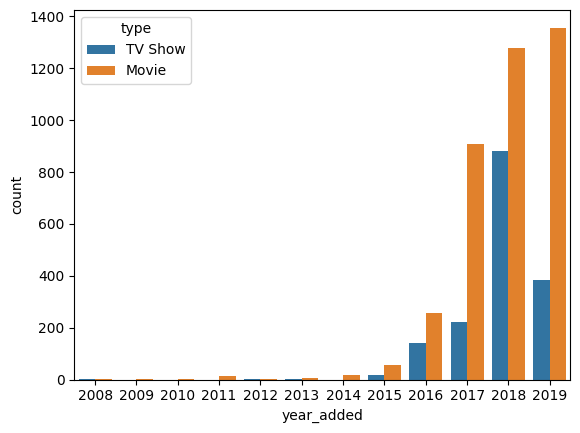

In [50]:
sns.countplot(x='year_added',hue='type',data=df)

In [51]:
# df.groupby('year_added')['type'].value_counts()

In [52]:
dup=df.duplicated(['title'])
# dup
df[dup]['title'].values

array(['Drive', 'Kakegurui', 'Supergirl', 'Limitless', 'Sarkar',
       'Oh My Ghost', 'Love O2O', 'Bleach', 'One Day', 'The Innocents',
       'The Birth Reborn', 'Oh My Ghost', 'Us and Them', 'Troy',
       'Locked Up', 'Love', 'The Outsider', 'Benji', 'Solo',
       'The Silence', 'The Silence', 'The Secret', 'Top Boy', 'Zoo',
       'Charmed', 'The Code', 'Manhunt', 'Love', 'Maniac',
       "She's Gotta Have It", 'The Saint', 'Hostages', 'The Oath',
       'Tunnel', 'Prince', 'Rosario Tijeras', 'We Are Family', 'Lavender',
       'Skins', 'Blood Money', 'Tiger', 'People You May Know',
       'The Lovers', 'Aquarius', 'Deep', 'Limitless', 'Frank and Cindy',
       'Retribution', 'Wet Hot American Summer', 'Life'], dtype=object)

In [53]:
# Identifying similar content by matching text-based features
for i in df[dup]['title'].values:
    print(df[df['title']==i][['title','type','release_year','country']])
    print('-'*20)

     title   type  release_year        country
101  Drive  Movie          2011  United States
212  Drive  Movie          2019          India
--------------------
          title     type  release_year country
957   Kakegurui  TV Show          2019   Japan
1134  Kakegurui  TV Show          2019   Japan
--------------------
          title     type  release_year                        country
492   Supergirl    Movie          1984  United Kingdom, United States
1244  Supergirl  TV Show          2019                  United States
--------------------
          title     type  release_year        country
474   Limitless    Movie          2017          India
1287  Limitless    Movie          2011  United States
5538  Limitless  TV Show          2016  United States
--------------------
       title   type  release_year country
1740  Sarkar  Movie          2018   India
1741  Sarkar  Movie          2018   India
--------------------
            title     type  release_year      country
775   O

In [54]:
# How many content its release year differ from its year added
counts=0
for i,j in zip(df.release_year.values,df.year_added.values):
    if i!=j:
       counts +=1 
print("The no.of content its release year differ from its year added are",str(counts))
    

The no.of content its release year differ from its year added are 3803
